In [23]:
import pandas as pd 
from datetime import datetime, timedelta


2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link

In [36]:
df = pd.read_csv('yt.csv')
df.head()

,VideoTitle,Video Url,Views,Posted,Videolength
0,All Your Queries Answered | DSA to Development...,https://www.youtube.com/watch?v=kHBzDvj3D2U,502,10 hours ago,3:47
1,Complete School Guide for CBSE | Free Resource...,https://www.youtube.com/watch?v=1ECMlxC6jbs,498,7 days ago,0:56
2,"Unraveling the Geek-a-thon: The What, How, and...",https://www.youtube.com/watch?v=6e0v_NhsFMQ,437,11 days ago,45:44
3,GeeksforGeeks Offline Classroom Program | Now ...,https://www.youtube.com/watch?v=2bPiFkt3Nmg,8.6K,13 days ago,0:28
4,First Ever KBC at our Offline Classes | Geeksf...,https://www.youtube.com/watch?v=chYg2EAKW2A,594,2 weeks ago,0:37


1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution

In [37]:

import re

start_date = datetime(2023, 2, 7)  
def convert_posted_to_datetime(posted_str):
    match = re.match(r'(\d+) (\w+) ago', posted_str)
    if match:
        value = int(match.group(1))
        unit = match.group(2)

        if unit == 'hour' or unit == 'hours':
            timedelta_value = timedelta(hours=value)
        elif unit == 'day' or unit == 'days':
            timedelta_value = timedelta(days=value)
        elif unit == 'week' or unit == 'weeks':
            timedelta_value = timedelta(weeks=value)
        elif unit == 'month' or unit == 'months':
            timedelta_value = timedelta(days=value * 30)
        elif unit == 'year' or unit == 'years':
            timedelta_value = timedelta(days=value * 12*365)
        else:
            raise ValueError(f"Unknown time unit: {unit}")

        return datetime.now() - timedelta_value
    else:
        raise ValueError("Invalid 'Posted' string format")

df['Posted'] = df['Posted'].apply(convert_posted_to_datetime)
current_date = datetime.now()
videos = df[(df['Posted'] > start_date) & (df['Posted'] <= current_date)]
last_six_months = videos.shape[0]
print(f"Number of videos in the past 6 months from {start_date.date()} to {current_date.date()}: {last_six_months}")


Number of videos in the past 6 months from 2023-02-07 to 2023-08-07: 36


3.Name the most viewed topics in the past 6 months.

In [38]:

start_date = current_date - timedelta(days=180)  
videos = df[(df['Posted'] > start_date) & (df['Posted'] <= current_date)]
most_viewed_topics = videos.groupby('VideoTitle')['Views'].sum().reset_index()
most_viewed_topics = most_viewed_topics.sort_values(by='Views', ascending=False)
print("Most viewed topics in the past 6 months:")
print(most_viewed_topics)


Most viewed topics in the past 6 months:
                                           VideoTitle  Views
9   Full Stack Development | LIVE Classes | Geeksf...   91K 
16  Job Fair for Students | Till 25th May Only | G...   82K 
11  GeeksforGeeks Offline Classroom Program | Now ...  8.6K 
31  🎊Celebrating Bi-Wizard's First Anniversary🎊 | ...   613 
7   Explore GeeksforGeeks Hiring Solutions | For T...   595 
8   First Ever KBC at our Offline Classes | Geeksf...   594 
0   All Your Queries Answered | DSA to Development...   502 
2   CodeCast Ep. 3 | Learn all About Competitive P...  5.8K 
5   DSA To Development: A Complete Coding Guide | ...   49K 
3   Complete School Guide for CBSE | Free Resource...   498 
27  Unraveling the Geek-a-thon: The What, How, and...   437 
15  How to become a Full Stack Developer | Geeksfo...  4.7K 
20            React VS Angular VS Vue | GeeksforGeeks    3K 
4          Create Your Own Apps Today | GeeksforGeeks   34K 
13  How to Use GPT 4 | How it's better from 

4. Name the topics with the highest video length.

In [43]:

def convert_video_length_to_minutes(video_length_str):
    hours, minutes = map(int, video_length_str.split(':'))
    total_minutes = hours * 60 + minutes
    return total_minutes

df['VideoLengthInMinutes'] = df['Videolength'].apply(convert_video_length_to_minutes)
max_video_length_index = df['VideoLengthInMinutes'].idxmax()
topic_with_highest_length = df.loc[max_video_length_index, 'VideoTitle']

print("Topic with the highest video length:", topic_with_highest_length)

Topic with the highest video length: Unraveling the Geek-a-thon: The What, How, and Why | Geek-A-Thon | GeeksforGeeks


5. Make a comparison between the number of views and video length using a Graph.

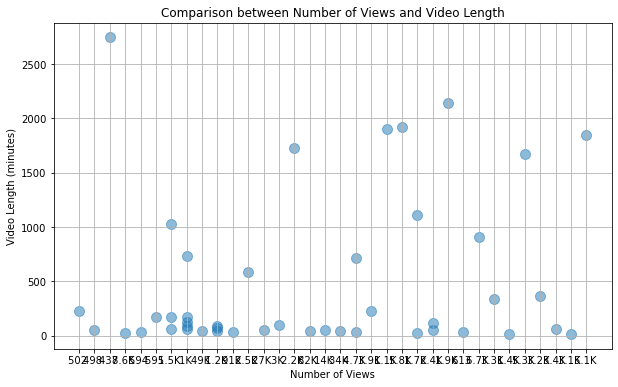

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Views'], df['VideoLengthInMinutes'], s=100, alpha=0.5)
plt.xlabel('Number of Views')
plt.ylabel('Video Length (minutes)')
plt.title('Comparison between Number of Views and Video Length')
plt.grid(True)
plt.show()